In [1]:
# This is to make the results reproducible if you are using the Jupyter notebook version.
from rich import print
from random import seed
import warnings

warnings.filterwarnings("ignore")

from IPython.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))
import random

random.seed(203)
import numpy as np

np.random.seed(345)
from rich import print
from pathlib import Path

# Getting Started
## Running a negotiation

NegMAS has several built-in negotiation `Mechanisms`, negotiation agents (`Negotiators`), and `UtilityFunctions`. You can use these to run negotiations as follows.

Imagine a buyer and a seller negotiating over the price of a single object. First, we make an issue "price" with 50 discrete values. Note here, it is possible to create multiple issues, but we will not include that here. If you are interested, see the [NegMAS documentation](https://negmas.readthedocs.io/en/latest/tutorials/01.running_simple_negotiation.html) for a tutorial.



In [2]:
from negmas import make_issue, SAOMechanism, TimeBasedConcedingNegotiator
from negmas.sao.negotiators import BoulwareTBNegotiator as Boulware
from negmas.sao.negotiators import LinearTBNegotiator as Linear
from negmas.preferences import LinearAdditiveUtilityFunction as UFun
from negmas.preferences.value_fun import IdentityFun, AffineFun

# create negotiation agenda (issues)
issues = [make_issue(name="price", values=50)]

# create the mechanism
mechanism = SAOMechanism(issues=issues, n_steps=20)

The negotiation protocol in NegMAS is handled by a `Mechanism` object. Here we instantiate a`SAOMechanism` which implements the [Stacked Alternating Offers Protocol](https://ii.tudelft.nl/~catholijn/publications/sites/default/files/Aydogan2017_Chapter_AlternatingOffersProtocolsForM.pdf). In this protocol, negotiators exchange offers until an offer is accepted by all negotiators (in this case 2), a negotiators leaves the table ending the negotiation or a time-out condition is met. In the example above, we use a limit on the number of rounds of `20` (a step of a mechanism is an executed round).

Next, we define the utilities of the seller and the buyer. The utility function of the seller is defined by the ```
IdentityFun```  which means that the higher the price, the higher the utility function. The buyer's utility function is reversed. The last two lines make sure that utility is scaled between 0 and 1.

In [3]:
seller_utility = UFun(values=[IdentityFun()], outcome_space=mechanism.outcome_space)

buyer_utility = UFun(
    values=[AffineFun(slope=-1)], outcome_space=mechanism.outcome_space
)

seller_utility = seller_utility.normalize()
buyer_utility = buyer_utility.normalize()

Then we add two agents with a boulware strategy. The negotiation ends with status overview. For example, you can see if the negotiation timed-out, what agreement was found, and how long the negotiation took. Moreover, we output the full negotiation history. For a more visual representation, we can plot the session. This shows the bidding curve, but also the proximity to e.g. the Nash point.

In [4]:
# create and add agent A and B
mechanism.add(Boulware(name="seller"), ufun=seller_utility)
mechanism.add(Linear(name="buyer"), ufun=buyer_utility)

# run the negotiation and show the results
print(mechanism.run())

SAOState(
    running=False,
    waiting=False,
    started=True,
    step=16,
    time=0.002764124990790151,
    relative_time=0.8095238095238095,
    broken=False,
    timedout=False,
    agreement=(35,),
    results=None,
    n_negotiators=2,
    has_error=False,
    error_details='',
    erred_negotiator='',
    erred_agent='',
    threads={},
    last_thread='',
    current_offer=(35,),
    current_proposer='buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5',
    current_proposer_agent=None,
    n_acceptances=2,
    new_offers=[],
    new_offerer_agents=[None, None],
    last_negotiator='buyer',
    current_data=None,
    new_data=[]
)

In this case, the negotiation ended with an agreement which is indicated by the `agreement` field of the [SAOState](https://negmas.readthedocs.io/en/latest/api/negmas.sao.SAOState.html#saostate).

We can see a trace of the negotiation giving the step number, agent-id and its offer using the `extended_trace` property of the mechanism (session):

In [5]:
# negotiation history
print(mechanism.extended_trace)

[
    (0, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (49,)),
    (0, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (2,)),
    (1, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (49,)),
    (1, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (4,)),
    (2, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (49,)),
    (2, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (7,)),
    (3, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (49,)),
    (3, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (9,)),
    (4, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (49,)),
    (4, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (11,)),
    (5, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (49,)),
    (5, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (14,)),
    (6, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (49,)),
    (6, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (16,)),
    (7, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (48,)),
    (7, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (18,)),
    (8, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (48,)),
    (8, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (21,)),
    (9, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (47,)),
    (9, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (23,)),
    (10, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (46,)),
    (10, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (25,)),
    (11, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (44,)),
    (11, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (28,)),
    (12, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (42,)),
    (12, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (30,)),
    (13, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (40,)),
    (13, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (32,)),
    (14, 'seller-63c642bc-a93f-4be8-b5a3-908abac0aca8', (37,)),
    (14, 'buyer-13946c38-1b59-4d6a-8e56-e0c0a5da54c5', (35,))
]

We can also plot the negotiation. 

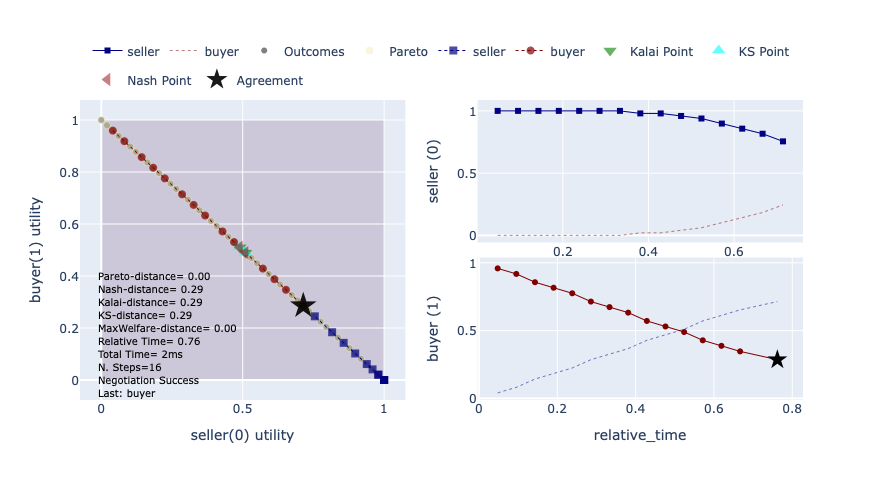

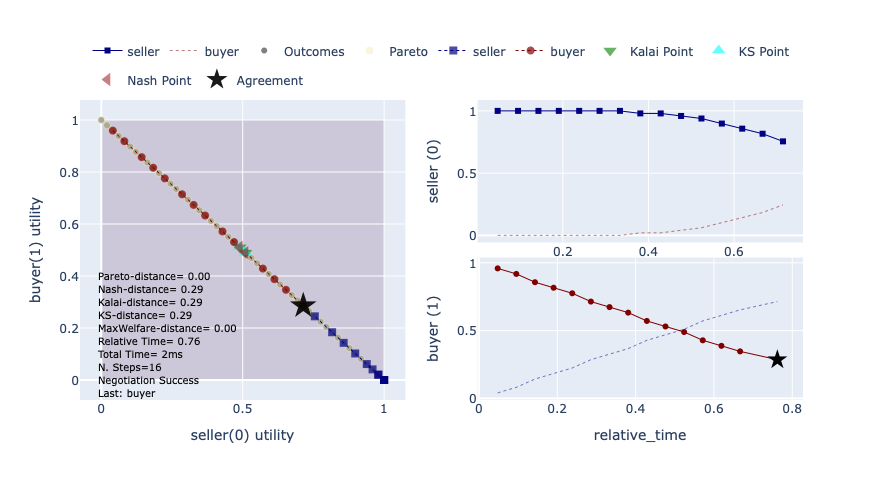

In [6]:
mechanism.plot(mark_max_welfare_points=False)

The most commonly used method for visualizing a negotiation is to plot the utility of one negotiator on the x-axis and the utility of the other in the y-axis, offers of different negotiators are then displayed in different colors. The agreement is marked by a black star and important points like the [Nash Bargaining Solution](https://en.wikipedia.org/wiki/Cooperative_bargaining#Nash_bargaining_solution), [Kalai/Egaliterian Bargaining Solution](https://en.wikipedia.org/wiki/Cooperative_bargaining#Egalitarian_bargaining_solution), [Kalai-Smorodonisky Bargaining Solution](https://en.wikipedia.org/wiki/Cooperative_bargaining#Kalai–Smorodinsky_bargaining_solution) and points with maximum welfare.  This kind of figure is shown in the left-hand side of the previous graph and can be produced by calling `plot()` on the mechanism. Because our single-issue negotiation is a zero-sum game, all points have the same welfare of `1.0` and lie on a straight line.

Another type of graph represents time (i.e. relative-time ranging from 0 to 1, real time, or step number) on the x-axis and represents the utility of one negotiator's offer for itself with a bold color on the y-axis. The utility of the offers from this negotiators for all other negotiators are also shown using a lighter line with no marks. This kind of representation is useful in understanding clearly the change of each negotiator's behavior over time (in terms of its own and its partners' utilities). In the previous graph, we can clearly see the difference between the seller's (upper right) and buyer's (lower right) offering strategies.

The `plot` function is very customizable and you can learn about all its parameters [here](https://negmas.readthedocs.io/en/latest/api/negmas.sao.SAOMechanism.html#negmas.sao.SAOMechanism.plot)
